# Individual Assignment 7
### Analyzing Data for Universitites
#### Seeing how median SAT score, accpetance rate, and expenditures per student affect the graduation rate for a list of 50 prestigous universities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adata = pd.read_csv('Universities.csv')
adata['Expenditures_per_Student']=adata['Expenditures_per_Student'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(int)
adata

,School,Type,Median_SAT,Acceptance_Rate_Perc,Expenditures_per_Student,Graduation_perc
0,Amherst,Lib Arts,1315,26,23972,93
1,Barnard,Lib Arts,1220,57,15887,80
2,Bates,Lib Arts,1240,40,15798,88
3,Berkeley,University,1176,36,26031,68
4,Bowdoin,Lib Arts,1300,28,23132,90
5,Brown,University,1281,23,26621,90
6,Bryn Mawr,Lib Arts,1255,60,16962,84
7,Cal Tech,University,1400,30,112488,75
8,Carleton,Lib Arts,1300,44,14313,80
9,Carnegie Mellon,University,1225,63,36967,77


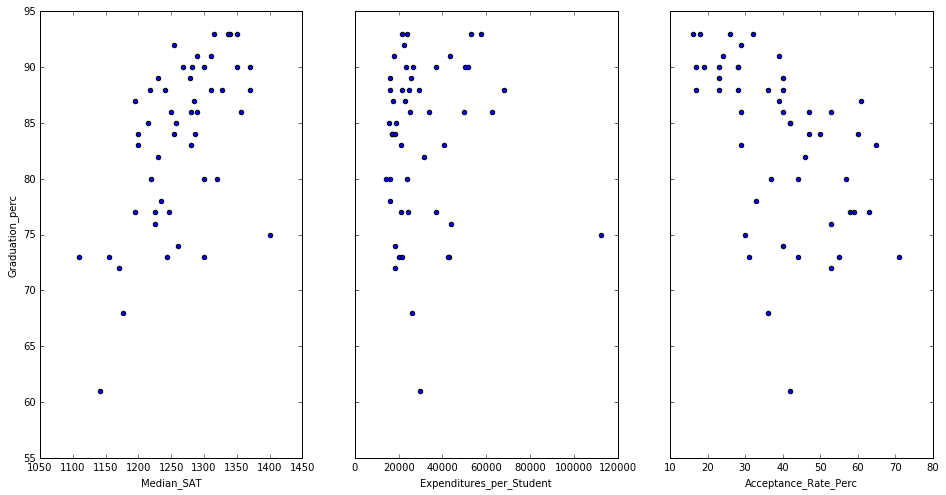

In [3]:
fig, axs = plt.subplots(1, 3, sharey=True)
adata.plot(kind='scatter', x='Median_SAT', y='Graduation_perc', ax=axs[0], figsize=(16, 8))
adata.plot(kind='scatter', x='Expenditures_per_Student', y='Graduation_perc', ax=axs[1])
adata.plot(kind='scatter', x='Acceptance_Rate_Perc', y='Graduation_perc', ax=axs[2])

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
input_cols = ['Median_SAT']
sat = adata[input_cols]
grad_perc = adata.Graduation_perc

sat_model = LinearRegression()
sat_model.fit(sat, grad_perc)

# print intercept and coefficients
print(sat_model.intercept_)
print(sat_model.coef_)

-1.93016253461
[ 0.06744739]


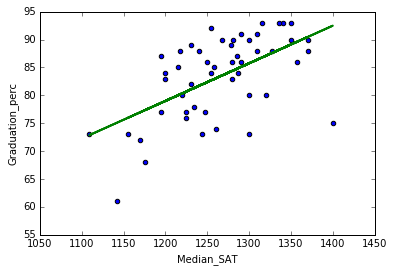

In [6]:
adata.plot(kind='scatter', x='Median_SAT', y='Graduation_perc')
plt.plot(sat, sat_model.predict(sat), c='green', linewidth=2)

In [7]:
##Calculate R score for the SAT score vs graduation
sat_model.score(sat, grad_perc)

0.32921984496098078

In [8]:
input_cols = ['Expenditures_per_Student']
exp = adata[input_cols]
grad_perc = adata.Graduation_perc

exp_model = LinearRegression()
exp_model.fit(exp, grad_perc)

# print intercept and coefficients
print(exp_model.intercept_)
print(exp_model.coef_)

83.0440186312
[  1.08449585e-05]


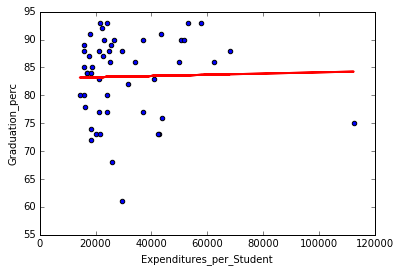

In [9]:
adata.plot(kind='scatter', x='Expenditures_per_Student', y='Graduation_perc')
plt.plot(exp, exp_model.predict(exp), c='red', linewidth=2)

In [10]:
##Calculate R score for the Expenditures vs graduation
exp_model.score(exp, grad_perc)

0.00069644476399255417

In [11]:
input_cols = ['Acceptance_Rate_Perc']
acc = adata[input_cols]
grad_perc = adata.Graduation_perc

acc_model = LinearRegression()
acc_model.fit(acc, grad_perc)

# print intercept and coefficients
print(acc_model.intercept_)
print(acc_model.coef_)

93.8951328076
[-0.26796975]


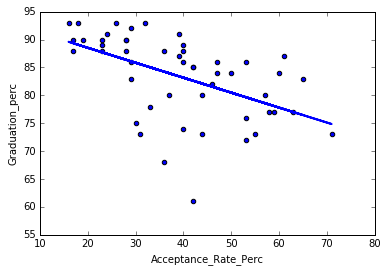

In [12]:
adata.plot(kind='scatter', x='Acceptance_Rate_Perc', y='Graduation_perc',)
plt.plot(acc, acc_model.predict(acc), c='blue', linewidth=2)

In [13]:
##Calculate R score for the Acceptance Rate vs Graduation Rate
exp_model.score(acc, grad_perc)

-0.0021004477029522572

In [14]:
input_cols = ['Median_SAT', 'Expenditures_per_Student', 'Acceptance_Rate_Perc']
multi = adata[input_cols]
grad_perc = adata.Graduation_perc

mul_model = LinearRegression()
mul_model.fit(multi, grad_perc)

# print intercept and coefficients
print(mul_model.intercept_)
print(mul_model.coef_)

2.58211601448
[ 0.0730278  -0.00017482 -0.15684619]


In [15]:
# Mean squared error
print(np.mean((mul_model.predict(multi) - grad_perc) ** 2)**.5)

# R-Squared value 
mul_model.score(multi, grad_perc)

5.207653333502493


0.49922716686843832

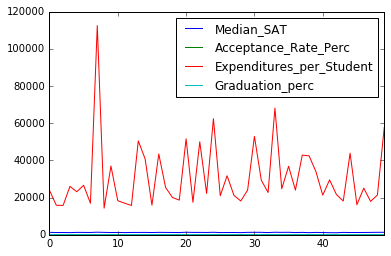

In [17]:
adata.plot()

# Results
### Correlations
##### The highest correlation was between median SAT score and graduation rate. With an R-Score of: 0.329. This shows that SAT score is the best measured indicator of the percantage of students that will graduate.
##### The second highest correlation was between acceptance rate and graduation percentage. With an R-Score of: -0.0021. This shows that the more students that a school accepts, the lower the graduation rate. This means it pays to picky if a University wants a high graduation rate.
##### The final measurement had almost no correlation. With an R-Score of:  0.000696. There is no real indicator on how the more expenses a student has will affect the graduation rate.
